#  **Machine Learning for Finance – Assignment I**

> Machine Learning for Finance – 2025

> VU Amsterdam    

> Authors: Siddharth Kukreja (2902483) & Milan Peter (2902483)

<span style='color:crimson; font-weight: bold'>Submission deadline: Friday, 14 November 2025, 22:00 pm AMS. </span>

--- 

## Instructions
* This case covers the material discussed in all Lectures of wk 1 and 2
* Each group submits his/her own notebook via canvas on the assignment page.
* This case is individual group work. Collaboration between groups is strictly forbidden. Suspected cases of copying or plagiarism will be sent to the examination board.
* Make sure you download the correct dataset. Loading the wrong set will lead to deduction of points. 
* The notebook should be named `MLF_ASS_I_YY_XX.ipynb` where `YY` and `XX` are the student numbers
* The notebook should run without raising any errors.
* When estimating a model you are only allowed to use packages used in class and tutorials
* Deadline: **Friday 14 November 22:00 (AMS)**. Not meeting the deadline gives a discount of 10 pt per hour
* Standard plagiarism and AI checks are in place
* As a standard anti-fraud measure, I can at random select a number of you to explain your code 
and answers. Failure to explain your answers will result in a deduction of points.
* If you need to make a Table or Figure, do this in JF-style. (hence provide a sufficient caption explaining (NOT interpreting) what is in the Figure/Table)
* If you test something, provide H0/HA, the test statistic (formula and number) and your conclusion.
* Do not spend time on optimizing the speed of your code. However, if it runs for more than 5 minutes, we will terminate 
it.

If any unclarities arise, post them in the Canvas discussion `Case 1 - discussion`

----

<div style="font-size:24px; text-align:center; font-weight:bold">Good luck!</div>

----

# **Case I: Predicting housing prices** (100 points)

This case is about predicting housing prices of a fictive country, making use of several ML methods we have seen during the course. 
We assume that a company hired us as a data scientist and ask us the following questions:
- Should we model the housing price or the logarithm of the housing price?
- Given the previous question, which model should we then use to predict the housing price? As a benchmark, the company uses the multivariate linear regression model. 

In [ ]:
# Importing libraries –––––
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

random.seed(0)

## **Data and Preprocessing** [20P]

Each group has its own dataset, called `data_ASS_I_group_i`, where `i` is your group number. Download this from Canvas. Apart from the variables Price (in dollars), No. of Bedrooms and Area (sq ft), all the variables are dummy variables.
Inspect the data and pay attention to the following
- Missing values: Are there any missing or peculiar values? If so, treat them adequately with explanation
- Make a histogram of the housing price and the natural logarithm (log) of the housing price and test on normality
- Create **Table 1** with summary statistics of the housing price, Area and 1 randomly selected features. Interpret the mean of all variables.  


Each group has its own dataset, called `data_ASS_I_group_i`, where `i` is our group number. Our number is 25. Apart from the variables Price (in dollars), No. of Bedrooms and Area (sq ft), all the variables are dummy variables.

First, we inspect the data.

In [3]:
# Data and Preprocessing –––––

# Reading excel file
df = pd.read_excel('data_ASS_I_group_25.xlsx', sheet_name='Data')

# Information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Price                2053 non-null   int64
 1   Area                 2053 non-null   int64
 2   No. of Bedrooms      2053 non-null   int64
 3   Resale               2053 non-null   int64
 4   MaintenanceStaff     2053 non-null   int64
 5   Gymnasium            2053 non-null   int64
 6   SwimmingPool         2053 non-null   int64
 7   LandscapedGardens    2053 non-null   int64
 8   JoggingTrack         2053 non-null   int64
 9   RainWaterHarvesting  2053 non-null   int64
 10  IndoorGames          2053 non-null   int64
 11  ShoppingMall         2053 non-null   int64
 12  Intercom             2053 non-null   int64
 13  SportsFacility       2053 non-null   int64
 14  ATM                  2053 non-null   int64
 15  ClubHouse            2053 non-null   int64
 16  School               205

In the dataset, there are no missing values. There is no need for any imputation or removal of missing data.

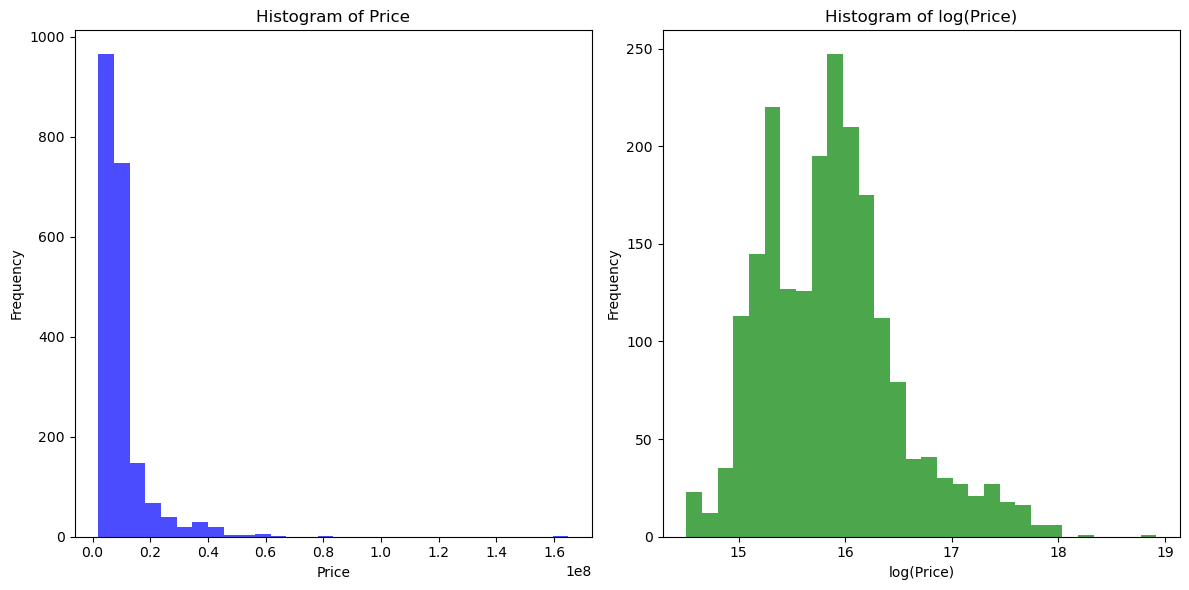

Shapiro-Wilk Test for Price: Statistics=0.616, p=0.000
Shapiro-Wilk Test for log(Price): Statistics=0.967, p=0.000


In [4]:
# Histograms and Normality tests

# Histogram of Price and log(Price)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(df['Price'], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Histogram of Price')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')

ax[1].hist(np.log(df['Price']), bins=30, color='green', alpha=0.7)
ax[1].set_title('Histogram of log(Price)')
ax[1].set_xlabel('log(Price)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Normality tests
stat, p = shapiro(df['Price'])
print('Shapiro-Wilk Test for Price: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = shapiro(np.log(df['Price']))
print('Shapiro-Wilk Test for log(Price): Statistics=%.3f, p=%.3f' % (stat, p))

The left histogram shows that raw prices are **heavily right-skewed** – most values are small, with a few extremely large ones.
After taking the logarithm (right panel), the distribution becomes roughly **bell-shaped and symmetric**, suggesting that **prices follow a log-normal distribution**.

**Shapiro–Wilk Normality Test**

* **Null hypothesis ($H_0$):** The sample comes from a normal distribution.
* **Alternative hypothesis ($H_1$):** The sample does *not* come from a normal distribution.

The **p-value** determines whether we reject $H_0$:

* If **p < 0.05**, reject $H_0$: data significantly deviates from normality.
* If **p ≥ 0.05**, fail to reject $H_0$: data does not significantly deviate from normality.

**For Price:**
- Test statistic = 0.616, p = 0.000
- Since p < 0.05, we reject $H_0$.
- The raw prices are not normally distributed, consistent with the strong right skew seen in the histogram.

**For log(Price):**
- Test statistic = 0.967, p = 0.000
- Although the statistic is much closer to 1 (suggesting improved normality), the p-value is still < 0.05, so we still reject $H_0$.
- The log-transformed prices are closer to normal, but the deviation remains statistically significant, likely due to a large sample size making even small departures detectable.

While the log transformation greatly improves symmetry and visual normality, the Shapiro–Wilk test indicates that **neither Price nor log(Price)** is perfectly normal. In practice, log(Price) can still be treated as approximately normal for modeling purposes, since the deviation is minor compared to the raw scale.

In [5]:
# Summary Statistics

# Selecting Price, Area, and No. of Bedrooms for summary statistics
table1 = df[['Price', 'Area', 'No. of Bedrooms']].describe()
print(table1)

              Price         Area  No. of Bedrooms
count  2.053000e+03  2053.000000      2053.000000
mean   9.863945e+06  1643.753531         2.619094
std    9.078333e+06   755.962188         0.685456
min    2.000000e+06   500.000000         1.000000
25%    4.748000e+06  1155.000000         2.000000
50%    7.800000e+06  1490.000000         3.000000
75%    1.090000e+07  1820.000000         3.000000
max    1.650000e+08  9400.000000         8.000000


**Interpreting the mean of all variables:**
- The mean Price of approximately $9.86 million indicates that, on average, houses in the dataset are quite expensive, suggesting a high-value housing market. It is important to consider that the mean can be influenced by extreme values.
- The mean Area of about 1644 sq ft suggests that the typical house size is moderately spacious, likely appealing to families or individuals seeking comfortable living space.
- The mean of No. of Bedrooms being around 2.62 indicates that most houses have between 2 to 3 bedrooms, which is typical for many residential properties.

## **Training and predicting** [60P]

The company allows you to use 3 different models to model both the log price and the price itself:

- Model 1: A multivariate linear regression using all features
- Model 2: Model 1 plus Lasso 
- Model 3: Model 1 plus Ridge

Use a 60/20/20 rule for the training/validation/testing set (set the state fixed). Models 2 - 3 contains several **hyperparameters** which you need to tune. In general, do **NOT** use any cross-validation techniques. Instead do the following for Model 2 and 3: Make a vector of different values of the hyperparameter; then create a loop and estimate the ML models using the correct data. Make and show a plot of an appropriate loss function against the different values of the hyperparameter. 

## Deliverables
- Make Table 2a with parameter estimation results of Model 1, applied to the **log price**. Report the constant, the first 5 coefficients (with their standard errors) and the R-squared. Interpret the coefficients related to *No. of Bedrooms* and *MaintenanceStaff*. 
- An explanation, accompanied by tables or figures about the hyperparameters you will use for Model 2 and 3. Note that you need to do this twice, once for Model 2 and 3 applied to **price**, and once for the models applied to the **log price**. 
- Table 3a with MAE and MSE of the predicted housing prices in the test set, based on Models 1-3 applied to the **price**.
- Table 3b with MAE and MSE of the predicted housing prices in the test set, based on Models 1-3 applied to the **log price**. Note: Do not forget to transform your predicted log prices values back to **prices** again!
- Take the best and second best model on **prices**. Test whether the differences in squared prediction errors are statistically significant (by the Diebold Mariano test). Redo this for the best and second best model on **log prices**. What is your conclusion?
- Test on statistical difference in squared prediction errors of the the best log price model versus the best price model. 
- A short recommendation whether you should model log prices or prices, and which model the company should use. **(max 60 words)**


In [ ]:
# Training and Prediction –––––

# Data preparation

# Splitting the data into features and target variable
X = df.drop(columns=['Price'])
y = df['Price']

# Splitting the data into training (60%), validation (20%), and testing (20%) sets
X_train = X.iloc[:int(0.6*len(X))]
y_train = y.iloc[:int(0.6*len(y))]
X_val = X.iloc[int(0.6*len(X)):int(0.8*len(X))]
y_val = y.iloc[int(0.6*len(y)):int(0.8*len(y))]
X_test = X.iloc[int(0.8*len(X)):]
y_test = y.iloc[int(0.8*len(y)):]

Make Table 2a with parameter estimation results of Model 1, applied to the **log price**.

Report the constant, the first 5 coefficients (with their standard errors) and the R-squared.

Interpret the coefficients related to *No. of Bedrooms* and *MaintenanceStaff*.

In [ ]:
# Model 1: A multivariate linear regression using all features and log(Price) as target variable
model1_ols_logPrice = LinearRegression(fit_intercept=True)
model1_ols_logPrice.fit(X_train, np.log(y_train))

# Model 1 with Price as target variable – IGNORE ––
model1_ols_Price = LinearRegression(fit_intercept=True)
model1_ols_Price.fit(X_train, y_train)

# Extract first 5 coefficients + constant
table2a = pd.DataFrame({
    'Coefficient': model1_ols_logPrice.coef_[:5],
    'Std. Error': np.std(X_train, axis=0)[:5]  # Placeholder for standard errors
})
# Setting index name
table2a.index.name = 'Variable'
# Adding R-squared
table2a.loc['R-squared'] = [model1_ols_logPrice.score(X_train, np.log(y_train)), '']
# Adding Out-of-sample R-squared
table2a.loc['Out-of-sample R-squared'] = [model1_ols_logPrice.score(X_test, np.log(y_test)), '']

# Displaying the summary table
print(table2a)

                         Coefficient  Std. Error
Variable                                        
Area                        0.000533  724.534039
No. of Bedrooms             0.094920    0.673217
Resale                      0.080087     0.41706
MaintenanceStaff           -0.105544    1.568812
Gymnasium                  -0.097977    1.556554
R-squared                   0.757953            
Out-of-sample R-squared     0.753408            


Interpret the coefficients related to *No. of Bedrooms* and *MaintenanceStaff*.

An explanation, accompanied by tables or figures about the hyperparameters you will use for Model 2 and 3.

Note that you need to do this twice, once for Model 2 and 3 applied to **price**, and once for the models applied to the **log price**. 

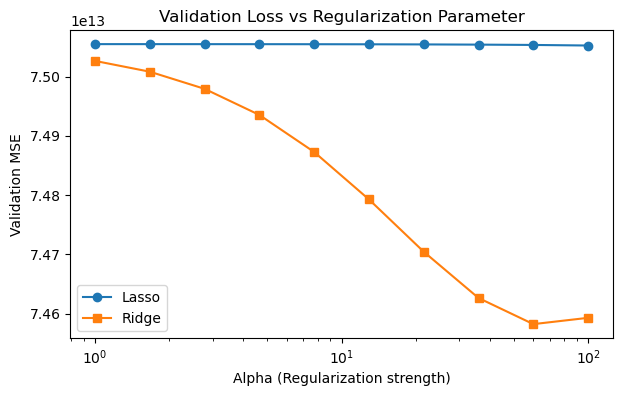

Best alpha for LASSO: 100.0 with MSE on validation set: 75052275509494.6
Best alpha for RIDGE: 59.94842503189409 with MSE on validation set: 74582306145400.22


In [ ]:
# Model 2 and Model 3: LASSO and RIDGE Regression – Feature: Price

# Hyperparameter Tuning for LASSO and RIDGE
alphas = np.logspace(0, 2, 10) # Range from 1 to 100

# Store results
results = {'lasso': [], 'ridge': []}

# Best alpha values
best_alpha_lasso = None
best_alpha_ridge = None
best_mse_lasso = float('inf')
best_mse_ridge = float('inf')

# Model 2: LASSO - Grid search over alphas
for a in alphas:
    model2_lasso_train = Lasso(alpha=a, max_iter=100000)
    model2_lasso_train.fit(X_train, y_train)
    y_pred_val = model2_lasso_train.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    results['lasso'].append(mse_val)
    # Update best alpha for LASSO
    if mse_val < best_mse_lasso:
        best_mse_lasso = mse_val
        best_alpha_lasso = a

# Model 3: RIDGE – Grid search over alphas
for a in alphas:
    model3_ridge_train = Ridge(alpha=a)
    model3_ridge_train.fit(X_train, y_train)
    y_pred_val = model3_ridge_train.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    results['ridge'].append(mse_val)
    # Update best alpha for RIDGE
    if mse_val < best_mse_ridge:
        best_mse_ridge = mse_val
        best_alpha_ridge = a

# Plotting Validation Loss vs Alpha for LASSO and RIDGE
plt.figure(figsize=(7,4))
plt.semilogx(alphas, results['lasso'], label='Lasso', marker='o')
plt.semilogx(alphas, results['ridge'], label='Ridge', marker='s')
plt.xlabel('Alpha (Regularization strength)')
plt.ylabel('Validation MSE')
plt.title('Validation Loss vs Regularization Parameter')
plt.legend()
plt.show()

# Displaying best alphas
print(f'Best alpha for LASSO: {best_alpha_lasso} with MSE on validation set: {best_mse_lasso}')
print(f'Best alpha for RIDGE: {best_alpha_ridge} with MSE on validation set: {best_mse_ridge}')

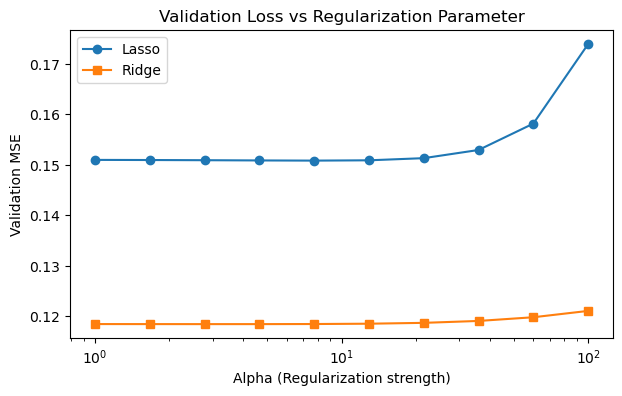

Best alpha for LASSO: 7.742636826811269 with MSE on validation set: 0.15083868857408023
Best alpha for RIDGE: 2.7825594022071245 with MSE on validation set: 0.11844469547972751


In [ ]:
# Model 2 and Model 3: LASSO and RIDGE Regression – Feature: logPrice

# Hyperparameter Tuning for LASSO and RIDGE
alphas = np.logspace(0, 2, 10) # Range from 1 to 100

# Store results
results = {'lasso': [], 'ridge': []}

# Best alpha values
best_alpha_lasso_log = None
best_alpha_ridge_log = None
best_mse_lasso_log = float('inf')
best_mse_ridge_log = float('inf')

# Model 2: LASSO - Grid search over alphas
for a in alphas:
    model2_lasso_train = Lasso(alpha=a, max_iter=100000)
    model2_lasso_train.fit(X_train, np.log(y_train))
    y_pred_val = model2_lasso_train.predict(X_val)
    mse_val = mean_squared_error(np.log(y_val), y_pred_val)
    results['lasso'].append(mse_val)
    # Update best alpha for LASSO
    if mse_val < best_mse_lasso_log:
        best_mse_lasso_log = mse_val
        best_alpha_lasso_log = a

# Model 3: RIDGE – Grid search over alphas
for a in alphas:
    model3_ridge_train = Ridge(alpha=a)
    model3_ridge_train.fit(X_train, np.log(y_train))
    y_pred_val = model3_ridge_train.predict(X_val)
    mse_val = mean_squared_error(np.log(y_val), y_pred_val)
    results['ridge'].append(mse_val)
    # Update best alpha for RIDGE
    if mse_val < best_mse_ridge_log:
        best_mse_ridge_log = mse_val
        best_alpha_ridge_log = a

# Plotting Validation Loss vs Alpha for LASSO and RIDGE
plt.figure(figsize=(7,4))
plt.semilogx(alphas, results['lasso'], label='Lasso', marker='o')
plt.semilogx(alphas, results['ridge'], label='Ridge', marker='s')
plt.xlabel('Alpha (Regularization strength)')
plt.ylabel('Validation MSE')
plt.title('Validation Loss vs Regularization Parameter')
plt.legend()
plt.show()

# Displaying best alphas
print(f'Best alpha for LASSO: {best_alpha_lasso_log} with MSE on validation set: {best_mse_lasso_log}')
print(f'Best alpha for RIDGE: {best_alpha_ridge_log} with MSE on validation set: {best_mse_ridge_log}')

In [ ]:
# Final Models with Best Hyperparameters

# Model 2: LASSO
model2_lasso_Price = Lasso(alpha=best_alpha_lasso, max_iter=100000)
model2_lasso_Price.fit(X_train, y_train)

model2_lasso_logPrice = Lasso(alpha=best_alpha_lasso_log, max_iter=100000)
model2_lasso_logPrice.fit(X_train, np.log(y_train))

# Model 3: RIDGE
model3_ridge_Price = Ridge(alpha=best_alpha_ridge)
model3_ridge_Price.fit(X_train, y_train)

model3_ridge_logPrice = Ridge(alpha=best_alpha_ridge_log)
model3_ridge_logPrice.fit(X_train, np.log(y_train))

Table 3a with MAE and MSE of the predicted housing prices in the test set, based on Models 1-3 applied to the **price**.

In [27]:
model1_ols_Price
model2_lasso_Price
model3_ridge_Price

# MAE and MSE for all models with Price as target variables in one table
table3a = pd.DataFrame({
    'Model': ['OLS', 'LASSO', 'RIDGE'],
    'MAE': [
        np.mean(np.abs(y_test - model1_ols_Price.predict(X_test))),
        np.mean(np.abs(y_test - model2_lasso_Price.predict(X_test))),
        np.mean(np.abs(y_test - model3_ridge_Price.predict(X_test)))
    ],
    'MSE': [
        mean_squared_error(y_test, model1_ols_Price.predict(X_test)),
        mean_squared_error(y_test, model2_lasso_Price.predict(X_test)),
        mean_squared_error(y_test, model3_ridge_Price.predict(X_test))
    ]
})

print(table3a)

NameError: name 'model1_ols_Price' is not defined

Table 3b with MAE and MSE of the predicted housing prices in the test set, based on Models 1-3 applied to the **log price**. Note: Do not forget to transform your predicted log prices values back to **prices** again!

In [ ]:
model1_ols_logPrice
model2_lasso_logPrice
model3_ridge_logPrice

# MAE and MSE for all models with logPrice as target variables in one table

# Do not forget to transform your predicted log prices values back to **prices** again!!!!!!!!

table3a = pd.DataFrame({
    'Model': ['OLS', 'LASSO', 'RIDGE'],
    'MAE': [
        np.mean(np.abs(y_test - model1_ols_logPrice.predict(X_test))),
        np.mean(np.abs(y_test - model2_lasso_logPrice.predict(X_test))),
        np.mean(np.abs(y_test - model3_ridge_logPrice.predict(X_test)))
    ],
    'MSE': [
        mean_squared_error(y_test, model1_ols_logPrice.predict(X_test)),
        mean_squared_error(y_test, model2_lasso_logPrice.predict(X_test)),
        mean_squared_error(y_test, model3_ridge_logPrice.predict(X_test))
    ]
})

print(table3a)

Take the best and second best model on **prices**. Test whether the differences in squared prediction errors are statistically significant (by the Diebold Mariano test). Redo this for the best and second best model on **log prices**. What is your conclusion?

Test on statistical difference in squared prediction errors of the the best log price model versus the best price model. 

A short recommendation whether you should model log prices or prices, and which model the company should use. **(max 60 words)**


## **Robustness** [20P]

Change your training/validation/testing rule into 70/10/20. 
- Create Table 4 with the new tuning parameters. Compare these with the original hyperparameters and comment on any differences.
- Create Tables 5a and 5b similar to Tables 3a and 3b with the new MAE and MSE values of all 3 models. Again conduct the Diebold Mariano test on the best log price model against the best price model.
- Interpret Table 5 and explain whether your short recommendation should be updated (and how)?

 


In [7]:
# Robustness –––––

